In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
df = pd.read_csv('medi.csv')  # Replace with your CSV file path

# Check the first few rows of the dataset to confirm it's loaded properly
df.head()



,Patient ID,Medication Name,Dosage,Duration,Effectiveness Rating
0,1,MedA,50,4,8
1,2,MedB,100,6,6
2,3,MedA,50,4,7
3,4,MedC,200,8,9
4,5,MedB,150,6,5


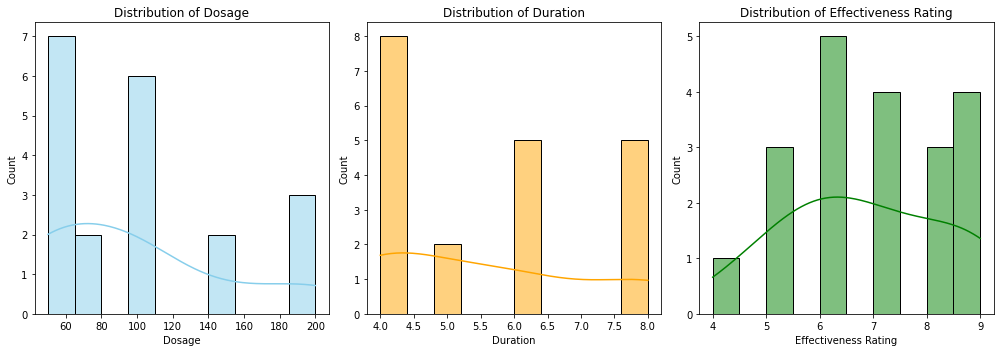

Mean Squared Error: 1.2924999999999995

Predictions vs Actual Effectiveness:
Predicted: 6.4, Actual: 8
Predicted: 9.0, Actual: 9
Predicted: 6.4, Actual: 7
Predicted: 4.5, Actual: 6


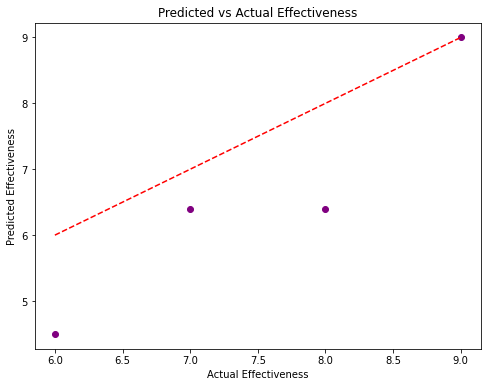

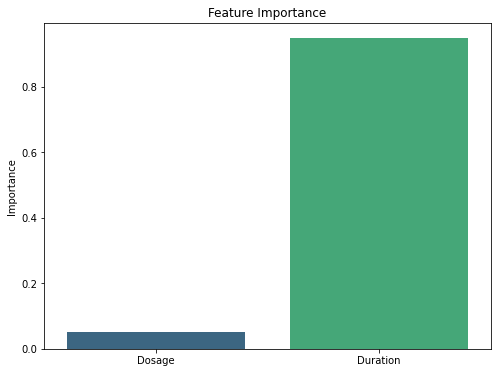

In [3]:
# Data visualization: Distributions of Dosage, Duration, and Effectiveness Rating
plt.figure(figsize=(14, 5))

# Plot 1: Distribution of Dosage
plt.subplot(1, 3, 1)
sns.histplot(df['Dosage'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Dosage')

# Plot 2: Distribution of Duration
plt.subplot(1, 3, 2)
sns.histplot(df['Duration'], kde=True, bins=10, color='orange')
plt.title('Distribution of Duration')

# Plot 3: Distribution of Effectiveness Rating
plt.subplot(1, 3, 3)
sns.histplot(df['Effectiveness Rating'], kde=True, bins=10, color='green')
plt.title('Distribution of Effectiveness Rating')

plt.tight_layout()
plt.show()

# Prepare the data (select features and target)
X = df[['Dosage', 'Duration']]  # Features (Dosage and Duration)
y = df['Effectiveness Rating']  # Target (Effectiveness Rating)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Decision Tree Regressor)
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print predictions vs actual effectiveness
print("\nPredictions vs Actual Effectiveness:")
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

# Visualization: Predicted vs Actual Effectiveness
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Effectiveness')
plt.xlabel('Actual Effectiveness')
plt.ylabel('Predicted Effectiveness')
plt.show()

# Feature Importance Visualization
feature_importance = model.feature_importances_
features = ['Dosage', 'Duration']

plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()
